In [1]:
import osmnx as ox
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import folium
from folium import plugins
import seaborn as sns
import networkx as nx
import re
import time
from ast import literal_eval

#os.environ["PROJ_LIB"] = "C:/Users/Utilisateur/Anaconda3/Library/share" ## a modifier
pd.set_option('display.max_colwidth', -1)
np.random.seed(100)

In [2]:
whole_raw_data = pd.read_csv('./Crimes_-_2001_to_present.csv')

In [3]:
data = whole_raw_data[['ID', 'Date', 'Latitude', 'Longitude']].dropna()
data['Year'] = data['Date'].str[6:10]
data['Month'] = data['Date'].str[:2]
data['YearMonth'] = data['Year'] + '-' + data['Month']

In [4]:
data.groupby('YearMonth').count()

,ID,Date,Latitude,Longitude,Year,Month
YearMonth,,,,,,
2001-01,37854,37854,37854,37854,37854,37854
2001-02,33608,33608,33608,33608,33608,33608
2001-03,40340,40340,40340,40340,40340,40340
2001-04,39852,39852,39852,39852,39852,39852
2001-05,41581,41581,41581,41581,41581,41581
2001-06,41464,41464,41464,41464,41464,41464
2001-07,44370,44370,44370,44370,44370,44370
2001-08,43755,43755,43755,43755,43755,43755
2001-09,41250,41250,41250,41250,41250,41250


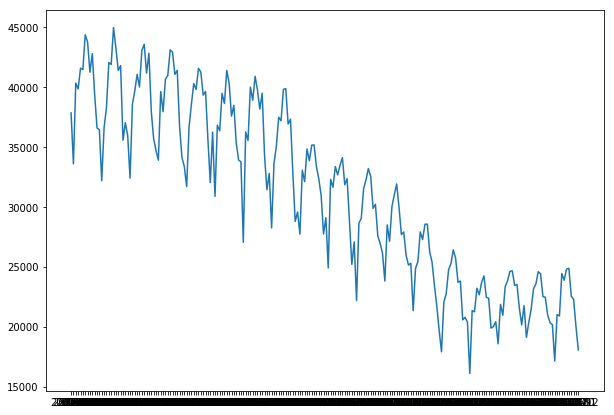

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(data.groupby('YearMonth').count()['ID'])
plt.show()

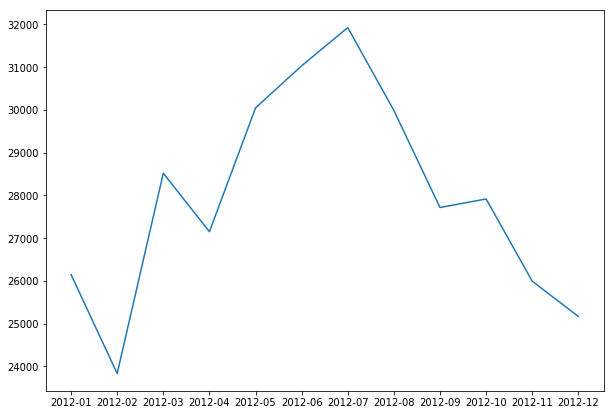

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(data[data['Year'] == '2012'].groupby('YearMonth').count()['ID'])
plt.show()

In [7]:
#data = data[(data['YearMonth']=='2012-04')]
data = data[(data['Year'].isin(['2011','2012','2013']))]

len(data)

X = data[['Latitude', 'Longitude']].values

X.shape

(993071, 2)

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=100, n_init=5)
model.fit(X)
data_points, count =np.unique(model.labels_, return_counts=True)

count

array([ 7118, 11874,    52, 23921, 17264,  8454, 13737, 10047, 10603,
        9961,  7661,  2123, 11252,  4771,  8163, 16321,  5259,  7621,
       10789,  9247, 10081, 13528, 11424,  8411,  7382,  4268,  9623,
       13430,  8294, 16147, 10403,  9253,  6151, 14768,  9989, 11210,
        6330,  3971,  8940,  4960,  7437,  9723, 16249, 13935,  4727,
       11392, 13559,  9332,  2109,  6946,  9141,  7260,  5258, 11951,
       14706,  9510, 22876,  8250, 12888,  8400, 18214, 10824, 12462,
       13189, 12248, 13637,  6868, 10659, 10819,  9619, 12721, 13998,
        8500,  4817,  8406, 10456,  6858,  6294,  4432,  9877,  6786,
       16407,  2190, 16327, 15548,  5477,  8387,  6552,  8161, 14456,
       10023, 10817,  7414, 11995,  5852,  9732,  9080, 14112, 10110,
        8297])

In [9]:
outl = data_points[count <= 0.3* model.labels_.shape[0] / data_points.shape[0]]
outl

array([ 2, 11, 48, 82], dtype=int32)

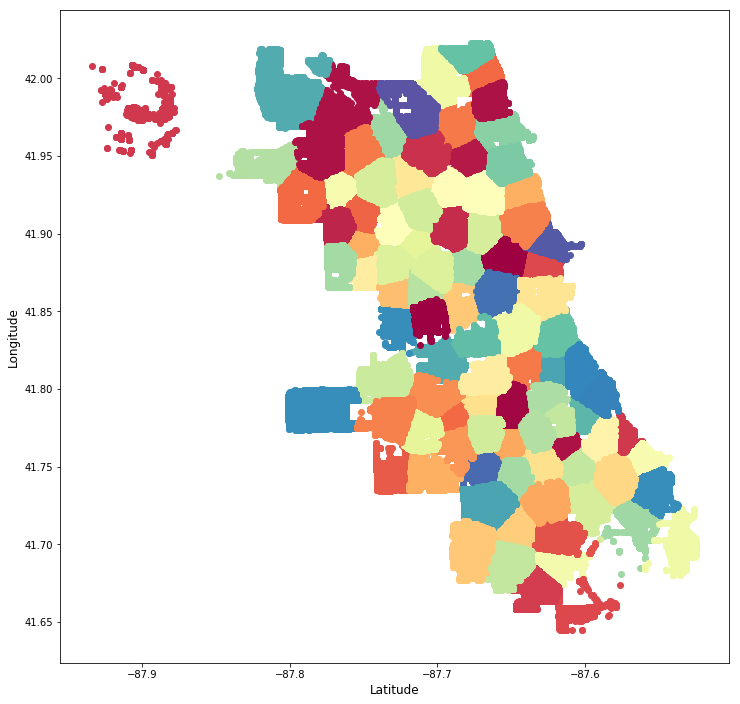

In [10]:
import matplotlib as mplt
cmap = mplt.cm.get_cmap("Spectral")

ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

cmpa2 = [cmap(float(i) /np.max(data_points)) for i in model.labels_]

for i in data_points:
    if i not in outl:
        cluster=np.where(model.labels_==i)[0]
        plt.scatter(X[:,1][cluster],X[:,0][cluster],c=cmpa2[i])#,ptsymb[i]
plt.show()

In [11]:
data_points[5]
data_clust_5 = data.loc[data.index[model.labels_==5]]
mid = np.mean(data_clust_5[['Latitude', 'Longitude']], axis=0)
mid

Latitude     41.779903
Longitude   -87.602207
dtype: float64

In [12]:
X5 = 111111*X[model.labels_ == 5]

In [13]:
radius = np.max(np.sum(np.abs(X5-np.mean(X5, axis=0)), axis=1))

In [14]:
chicago_5 = ox.graph_from_point(mid.values, distance=radius/2)

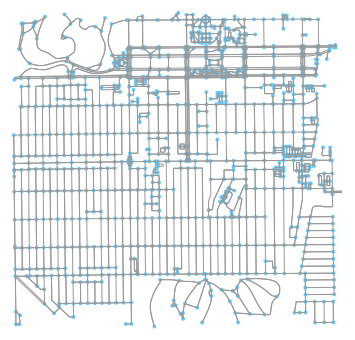

(<Figure size 439.8x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2424b2438>)

In [16]:
ox.plot_graph(ox.project_graph(chicago_5))

In [17]:
nodes = {}
for idx, row in data_clust_5.iterrows():
    print('Computing nearest {}'.format(idx))
    nodes[idx] = ox.get_nearest_node(chicago_5, (row['Latitude'], row['Longitude']))


Computing nearest 734231
Computing nearest 1244264
Computing nearest 1244271
Computing nearest 1244326
Computing nearest 1244668
Computing nearest 1244785
Computing nearest 1244790
Computing nearest 1244966
Computing nearest 1245096
Computing nearest 1245188
Computing nearest 1245215
Computing nearest 1245549
Computing nearest 1245595
Computing nearest 1245947
Computing nearest 1246105
Computing nearest 1246112
Computing nearest 1246168
Computing nearest 1246195
Computing nearest 1246405
Computing nearest 1246621
Computing nearest 1246787
Computing nearest 1246799
Computing nearest 1246800
Computing nearest 1246955
Computing nearest 1246970
Computing nearest 1247080
Computing nearest 1247210
Computing nearest 1247394
Computing nearest 1247456
Computing nearest 1247603
Computing nearest 1247658
Computing nearest 1247665
Computing nearest 1247688
Computing nearest 1247694
Computing nearest 1247936
Computing nearest 1248002
Computing nearest 1248208
Computing nearest 1248341
Computing nea

Computing nearest 1307009
Computing nearest 1307093
Computing nearest 1307098
Computing nearest 1307135
Computing nearest 1307162
Computing nearest 1307206
Computing nearest 1307400
Computing nearest 1307461
Computing nearest 1307540
Computing nearest 1307576
Computing nearest 1307579
Computing nearest 1307604
Computing nearest 1308033
Computing nearest 1308079
Computing nearest 1308288
Computing nearest 1308330
Computing nearest 1308331
Computing nearest 1308360
Computing nearest 1308417
Computing nearest 1308476
Computing nearest 1308560
Computing nearest 1309277
Computing nearest 1310473
Computing nearest 1310578
Computing nearest 1343141
Computing nearest 1343658
Computing nearest 1344063
Computing nearest 1344388
Computing nearest 1344551
Computing nearest 1344646
Computing nearest 1345411
Computing nearest 1345413
Computing nearest 1345686
Computing nearest 1345825
Computing nearest 1345958
Computing nearest 1346008
Computing nearest 1346164
Computing nearest 1346432
Computing ne

Computing nearest 1396156
Computing nearest 1396443
Computing nearest 1396522
Computing nearest 1396552
Computing nearest 1396626
Computing nearest 1396762
Computing nearest 1397017
Computing nearest 1397021
Computing nearest 1397059
Computing nearest 1397443
Computing nearest 1397504
Computing nearest 1397673
Computing nearest 1408088
Computing nearest 1409761
Computing nearest 1410859
Computing nearest 1411117
Computing nearest 1414390
Computing nearest 1414649
Computing nearest 1415143
Computing nearest 1415330
Computing nearest 1415916
Computing nearest 1416108
Computing nearest 1416185
Computing nearest 1416422
Computing nearest 1417168
Computing nearest 1417219
Computing nearest 1417251
Computing nearest 1417267
Computing nearest 1417801
Computing nearest 1418043
Computing nearest 1418178
Computing nearest 1418291
Computing nearest 1418296
Computing nearest 1418371
Computing nearest 1418375
Computing nearest 1418426
Computing nearest 1418536
Computing nearest 1418651
Computing ne

Computing nearest 1455068
Computing nearest 1455095
Computing nearest 1455128
Computing nearest 1455255
Computing nearest 1455299
Computing nearest 1455493
Computing nearest 1455508
Computing nearest 1455510
Computing nearest 1455538
Computing nearest 1455555
Computing nearest 1455590
Computing nearest 1455782
Computing nearest 1455792
Computing nearest 1455847
Computing nearest 1455897
Computing nearest 1456061
Computing nearest 1456088
Computing nearest 1456228
Computing nearest 1456279
Computing nearest 1456334
Computing nearest 1456609
Computing nearest 1456645
Computing nearest 1456728
Computing nearest 1456941
Computing nearest 1456968
Computing nearest 1457416
Computing nearest 1457706
Computing nearest 1457758
Computing nearest 1457792
Computing nearest 1457974
Computing nearest 1458019
Computing nearest 1458040
Computing nearest 1458041
Computing nearest 1458253
Computing nearest 1458334
Computing nearest 1458659
Computing nearest 1458663
Computing nearest 1458696
Computing ne

Computing nearest 1490829
Computing nearest 1490836
Computing nearest 1490942
Computing nearest 1491073
Computing nearest 1491133
Computing nearest 1491135
Computing nearest 1491335
Computing nearest 1491430
Computing nearest 1491459
Computing nearest 1491540
Computing nearest 1491768
Computing nearest 1491833
Computing nearest 1492017
Computing nearest 1492030
Computing nearest 1492164
Computing nearest 1492174
Computing nearest 1492204
Computing nearest 1492478
Computing nearest 1492563
Computing nearest 1492630
Computing nearest 1492633
Computing nearest 1492634
Computing nearest 1492635
Computing nearest 1492664
Computing nearest 1493014
Computing nearest 1493209
Computing nearest 1493313
Computing nearest 1493417
Computing nearest 1493442
Computing nearest 1493449
Computing nearest 1493533
Computing nearest 1493545
Computing nearest 1493655
Computing nearest 1493731
Computing nearest 1494118
Computing nearest 1494127
Computing nearest 1494174
Computing nearest 1494510
Computing ne

Computing nearest 1527542
Computing nearest 1527974
Computing nearest 1528006
Computing nearest 1528066
Computing nearest 1528099
Computing nearest 1528230
Computing nearest 1528239
Computing nearest 1528324
Computing nearest 1528347
Computing nearest 1528349
Computing nearest 1528378
Computing nearest 1528497
Computing nearest 1528556
Computing nearest 1528658
Computing nearest 1528730
Computing nearest 1528946
Computing nearest 1529044
Computing nearest 1529116
Computing nearest 1529139
Computing nearest 1529168
Computing nearest 1529236
Computing nearest 1529470
Computing nearest 1529725
Computing nearest 1529771
Computing nearest 1529778
Computing nearest 1529795
Computing nearest 1530054
Computing nearest 1530362
Computing nearest 1530459
Computing nearest 1530690
Computing nearest 1530715
Computing nearest 1531050
Computing nearest 1531052
Computing nearest 1531053
Computing nearest 1531136
Computing nearest 1531169
Computing nearest 1531194
Computing nearest 1531432
Computing ne

Computing nearest 2768195
Computing nearest 2768281
Computing nearest 2768338
Computing nearest 2768392
Computing nearest 2768464
Computing nearest 2768772
Computing nearest 2768828
Computing nearest 2768935
Computing nearest 2769157
Computing nearest 2769345
Computing nearest 2769386
Computing nearest 2769489
Computing nearest 2769557
Computing nearest 2769851
Computing nearest 2769999
Computing nearest 2770014
Computing nearest 2770115
Computing nearest 2770352
Computing nearest 2770410
Computing nearest 2770689
Computing nearest 2770733
Computing nearest 2770983
Computing nearest 2771092
Computing nearest 2771096
Computing nearest 2771142
Computing nearest 2771230
Computing nearest 2771512
Computing nearest 2771551
Computing nearest 2771552
Computing nearest 2771641
Computing nearest 2771675
Computing nearest 2771755
Computing nearest 2771778
Computing nearest 2771938
Computing nearest 2772032
Computing nearest 2772398
Computing nearest 2772407
Computing nearest 2772419
Computing ne

Computing nearest 2807860
Computing nearest 2807915
Computing nearest 2807965
Computing nearest 2808057
Computing nearest 2808161
Computing nearest 2808165
Computing nearest 2808404
Computing nearest 2808488
Computing nearest 2808490
Computing nearest 2808507
Computing nearest 2808627
Computing nearest 2808768
Computing nearest 2808862
Computing nearest 2808891
Computing nearest 2808986
Computing nearest 2808991
Computing nearest 2809031
Computing nearest 2809060
Computing nearest 2809110
Computing nearest 2809211
Computing nearest 2809220
Computing nearest 2809255
Computing nearest 2809611
Computing nearest 2810365
Computing nearest 2810442
Computing nearest 2810490
Computing nearest 2810541
Computing nearest 2810596
Computing nearest 2810621
Computing nearest 2810632
Computing nearest 2810832
Computing nearest 2810902
Computing nearest 2811321
Computing nearest 2811368
Computing nearest 2811387
Computing nearest 2811610
Computing nearest 2811930
Computing nearest 2811949
Computing ne

Computing nearest 2846889
Computing nearest 2846901
Computing nearest 2846928
Computing nearest 2846967
Computing nearest 2847084
Computing nearest 2847116
Computing nearest 2847267
Computing nearest 2847354
Computing nearest 2847461
Computing nearest 2847948
Computing nearest 2848086
Computing nearest 2848166
Computing nearest 2848669
Computing nearest 2848672
Computing nearest 2848696
Computing nearest 2848708
Computing nearest 2848747
Computing nearest 2848958
Computing nearest 2848960
Computing nearest 2849064
Computing nearest 2849066
Computing nearest 2849153
Computing nearest 2849336
Computing nearest 2849841
Computing nearest 2849979
Computing nearest 2849983
Computing nearest 2849985
Computing nearest 2850083
Computing nearest 2850521
Computing nearest 2850698
Computing nearest 2850897
Computing nearest 2851034
Computing nearest 2851112
Computing nearest 2851194
Computing nearest 2851498
Computing nearest 2851586
Computing nearest 2851587
Computing nearest 2851701
Computing ne

Computing nearest 2881288
Computing nearest 2881746
Computing nearest 2881880
Computing nearest 2881987
Computing nearest 2882065
Computing nearest 2882202
Computing nearest 2882305
Computing nearest 2882463
Computing nearest 2882555
Computing nearest 2882614
Computing nearest 2882627
Computing nearest 2882741
Computing nearest 2882957
Computing nearest 2883201
Computing nearest 2883313
Computing nearest 2883392
Computing nearest 2883481
Computing nearest 2883483
Computing nearest 2883496
Computing nearest 2883615
Computing nearest 2883798
Computing nearest 2883819
Computing nearest 2883913
Computing nearest 2883936
Computing nearest 2884016
Computing nearest 2884021
Computing nearest 2884144
Computing nearest 2884171
Computing nearest 2884274
Computing nearest 2884277
Computing nearest 2884289
Computing nearest 2884440
Computing nearest 2884697
Computing nearest 2884838
Computing nearest 2884943
Computing nearest 2884956
Computing nearest 2884965
Computing nearest 2885287
Computing ne

Computing nearest 2913787
Computing nearest 2913789
Computing nearest 2914014
Computing nearest 2914034
Computing nearest 2914069
Computing nearest 2914076
Computing nearest 2914183
Computing nearest 2914249
Computing nearest 2914351
Computing nearest 2914399
Computing nearest 2914717
Computing nearest 2914790
Computing nearest 2914858
Computing nearest 2914906
Computing nearest 2914919
Computing nearest 2915144
Computing nearest 2915695
Computing nearest 2915740
Computing nearest 2915886
Computing nearest 2915954
Computing nearest 2916073
Computing nearest 2916101
Computing nearest 2916297
Computing nearest 2916425
Computing nearest 2916610
Computing nearest 2916784
Computing nearest 2916785
Computing nearest 2917040
Computing nearest 2917181
Computing nearest 2917220
Computing nearest 2917227
Computing nearest 2917228
Computing nearest 2917382
Computing nearest 2917383
Computing nearest 2917423
Computing nearest 2917691
Computing nearest 2917863
Computing nearest 2917898
Computing ne

Computing nearest 2950794
Computing nearest 2950815
Computing nearest 2951067
Computing nearest 2951122
Computing nearest 2951278
Computing nearest 2951292
Computing nearest 2951744
Computing nearest 2951912
Computing nearest 2951981
Computing nearest 2952118
Computing nearest 2952130
Computing nearest 2952306
Computing nearest 2952538
Computing nearest 2952747
Computing nearest 2952957
Computing nearest 2953285
Computing nearest 2953323
Computing nearest 2953505
Computing nearest 2953997
Computing nearest 2954042
Computing nearest 2954080
Computing nearest 2954117
Computing nearest 2954238
Computing nearest 2954299
Computing nearest 2954532
Computing nearest 2954659
Computing nearest 2954803
Computing nearest 2955032
Computing nearest 2955129
Computing nearest 2955178
Computing nearest 2955283
Computing nearest 2955337
Computing nearest 2955502
Computing nearest 2955536
Computing nearest 2955548
Computing nearest 2955679
Computing nearest 2955792
Computing nearest 2956036
Computing ne

Computing nearest 2994160
Computing nearest 2994293
Computing nearest 2994426
Computing nearest 2994438
Computing nearest 2994636
Computing nearest 2994775
Computing nearest 2994860
Computing nearest 2995300
Computing nearest 2995304
Computing nearest 2995619
Computing nearest 2995868
Computing nearest 2996155
Computing nearest 2996224
Computing nearest 2996337
Computing nearest 2996400
Computing nearest 2996490
Computing nearest 2996523
Computing nearest 2996901
Computing nearest 2996965
Computing nearest 2997236
Computing nearest 2997410
Computing nearest 2997440
Computing nearest 2997486
Computing nearest 2997651
Computing nearest 2997654
Computing nearest 2997665
Computing nearest 2997677
Computing nearest 2997722
Computing nearest 2997942
Computing nearest 2998002
Computing nearest 2998065
Computing nearest 2998127
Computing nearest 2998223
Computing nearest 2998339
Computing nearest 2998358
Computing nearest 2998498
Computing nearest 2998545
Computing nearest 2998694
Computing ne

Computing nearest 3033649
Computing nearest 3033854
Computing nearest 3034077
Computing nearest 3034079
Computing nearest 3034219
Computing nearest 3034314
Computing nearest 3035083
Computing nearest 3035150
Computing nearest 3035163
Computing nearest 3035187
Computing nearest 3035332
Computing nearest 3035637
Computing nearest 3035789
Computing nearest 3036020
Computing nearest 3036212
Computing nearest 3036330
Computing nearest 3036417
Computing nearest 3036432
Computing nearest 3036499
Computing nearest 3036564
Computing nearest 3036683
Computing nearest 3036750
Computing nearest 3036777
Computing nearest 3036870
Computing nearest 3037058
Computing nearest 3037338
Computing nearest 3037380
Computing nearest 3037469
Computing nearest 3037473
Computing nearest 3037779
Computing nearest 3037789
Computing nearest 3037833
Computing nearest 3037853
Computing nearest 3038003
Computing nearest 3038382
Computing nearest 3038423
Computing nearest 3038667
Computing nearest 3038691
Computing ne

Computing nearest 3072090
Computing nearest 3072664
Computing nearest 3072670
Computing nearest 3072673
Computing nearest 3072984
Computing nearest 3073002
Computing nearest 3073023
Computing nearest 3073126
Computing nearest 3073233
Computing nearest 3073347
Computing nearest 3073384
Computing nearest 3073409
Computing nearest 3073414
Computing nearest 3073527
Computing nearest 3073871
Computing nearest 3074001
Computing nearest 3074162
Computing nearest 3074191
Computing nearest 3074279
Computing nearest 3074295
Computing nearest 3074343
Computing nearest 3074363
Computing nearest 3074638
Computing nearest 3074742
Computing nearest 3074775
Computing nearest 3074912
Computing nearest 3075136
Computing nearest 3075495
Computing nearest 3075496
Computing nearest 3075836
Computing nearest 3075931
Computing nearest 3076241
Computing nearest 3076317
Computing nearest 3076431
Computing nearest 3076439
Computing nearest 3076688
Computing nearest 3076814
Computing nearest 3076827
Computing ne

Computing nearest 3112010
Computing nearest 3112090
Computing nearest 3112134
Computing nearest 3112152
Computing nearest 3112249
Computing nearest 3112322
Computing nearest 3112945
Computing nearest 3113009
Computing nearest 3113084
Computing nearest 3113357
Computing nearest 3113479
Computing nearest 3113486
Computing nearest 3113514
Computing nearest 3113622
Computing nearest 3113778
Computing nearest 3113951
Computing nearest 3114011
Computing nearest 3114174
Computing nearest 3114269
Computing nearest 3114906
Computing nearest 3114967
Computing nearest 3114993
Computing nearest 3115030
Computing nearest 3115124
Computing nearest 3115147
Computing nearest 3115277
Computing nearest 3115330
Computing nearest 3115336
Computing nearest 3115546
Computing nearest 3115644
Computing nearest 3115804
Computing nearest 3115859
Computing nearest 3115875
Computing nearest 3115901
Computing nearest 3115977
Computing nearest 3115979
Computing nearest 3116014
Computing nearest 3116204
Computing ne

Computing nearest 3150490
Computing nearest 3150957
Computing nearest 3151671
Computing nearest 3151696
Computing nearest 3151868
Computing nearest 3151916
Computing nearest 3151918
Computing nearest 3152007
Computing nearest 3152126
Computing nearest 3152183
Computing nearest 3152450
Computing nearest 3152481
Computing nearest 3152550
Computing nearest 3152707
Computing nearest 3152876
Computing nearest 3152988
Computing nearest 3153085
Computing nearest 3153270
Computing nearest 3153446
Computing nearest 3153513
Computing nearest 3153708
Computing nearest 3153913
Computing nearest 3154145
Computing nearest 3154439
Computing nearest 3154440
Computing nearest 3154446
Computing nearest 3154461
Computing nearest 3154514
Computing nearest 3154560
Computing nearest 3154769
Computing nearest 3154949
Computing nearest 3155032
Computing nearest 3155045
Computing nearest 3155071
Computing nearest 3155116
Computing nearest 3155119
Computing nearest 3155136
Computing nearest 3155362
Computing ne

Computing nearest 3194612
Computing nearest 3195082
Computing nearest 3195121
Computing nearest 3195224
Computing nearest 3195408
Computing nearest 3195891
Computing nearest 3196188
Computing nearest 3196233
Computing nearest 3196639
Computing nearest 3196657
Computing nearest 3196876
Computing nearest 3197172
Computing nearest 3197326
Computing nearest 3197485
Computing nearest 3197504
Computing nearest 3197568
Computing nearest 3197816
Computing nearest 3197898
Computing nearest 3198025
Computing nearest 3198226
Computing nearest 3198237
Computing nearest 3198245
Computing nearest 3198260
Computing nearest 3198269
Computing nearest 3198404
Computing nearest 3198495
Computing nearest 3198871
Computing nearest 3198976
Computing nearest 3199060
Computing nearest 3199061
Computing nearest 3199120
Computing nearest 3199308
Computing nearest 3199402
Computing nearest 3199406
Computing nearest 3199478
Computing nearest 3199529
Computing nearest 3199552
Computing nearest 3199601
Computing ne

Computing nearest 3232375
Computing nearest 3232456
Computing nearest 3232473
Computing nearest 3232490
Computing nearest 3232961
Computing nearest 3233310
Computing nearest 3233344
Computing nearest 3233513
Computing nearest 3233659
Computing nearest 3233763
Computing nearest 3233847
Computing nearest 3234001
Computing nearest 3234181
Computing nearest 3234274
Computing nearest 3234353
Computing nearest 3234740
Computing nearest 3234779
Computing nearest 3234876
Computing nearest 3234879
Computing nearest 3235127
Computing nearest 3235603
Computing nearest 3235859
Computing nearest 3235924
Computing nearest 3235955
Computing nearest 3235965
Computing nearest 3236031
Computing nearest 3236139
Computing nearest 3236376
Computing nearest 3236384
Computing nearest 3236541
Computing nearest 3236703
Computing nearest 3236827
Computing nearest 3236874
Computing nearest 3236878
Computing nearest 3237099
Computing nearest 3237100
Computing nearest 3237105
Computing nearest 3237403
Computing ne

Computing nearest 3279017
Computing nearest 3279018
Computing nearest 3279035
Computing nearest 3279265
Computing nearest 3279624
Computing nearest 3279682
Computing nearest 3279771
Computing nearest 3279849
Computing nearest 3280025
Computing nearest 3280167
Computing nearest 3280518
Computing nearest 3280520
Computing nearest 3280697
Computing nearest 3280718
Computing nearest 3280967
Computing nearest 3281067
Computing nearest 3281198
Computing nearest 3281239
Computing nearest 3281256
Computing nearest 3281440
Computing nearest 3281491
Computing nearest 3281492
Computing nearest 3281900
Computing nearest 3281986
Computing nearest 3281988
Computing nearest 3281992
Computing nearest 3282269
Computing nearest 3282318
Computing nearest 3282447
Computing nearest 3282639
Computing nearest 3282940
Computing nearest 3283208
Computing nearest 3283223
Computing nearest 3283319
Computing nearest 3283344
Computing nearest 3283390
Computing nearest 3283654
Computing nearest 3283662
Computing ne

Computing nearest 3321296
Computing nearest 3321615
Computing nearest 3321724
Computing nearest 3321725
Computing nearest 3321740
Computing nearest 3321777
Computing nearest 3321988
Computing nearest 3322003
Computing nearest 3322080
Computing nearest 3322234
Computing nearest 3322499
Computing nearest 3322579
Computing nearest 3322761
Computing nearest 3322879
Computing nearest 3323011
Computing nearest 3323070
Computing nearest 3323073
Computing nearest 3323462
Computing nearest 3323775
Computing nearest 3324136
Computing nearest 3324878
Computing nearest 3324949
Computing nearest 3325318
Computing nearest 3325437
Computing nearest 3325438
Computing nearest 3325605
Computing nearest 3325652
Computing nearest 3325756
Computing nearest 3325883
Computing nearest 3325984
Computing nearest 3326033
Computing nearest 3326096
Computing nearest 3326408
Computing nearest 3326527
Computing nearest 3326731
Computing nearest 3326732
Computing nearest 3326925
Computing nearest 3327095
Computing ne

Computing nearest 3365552
Computing nearest 3365556
Computing nearest 3366164
Computing nearest 3366209
Computing nearest 3366358
Computing nearest 3366391
Computing nearest 3366687
Computing nearest 3366781
Computing nearest 3367014
Computing nearest 3367018
Computing nearest 3367028
Computing nearest 3367789
Computing nearest 3367944
Computing nearest 3367992
Computing nearest 3367997
Computing nearest 3368344
Computing nearest 3368347
Computing nearest 3368458
Computing nearest 3368547
Computing nearest 3368744
Computing nearest 3368749
Computing nearest 3368920
Computing nearest 3368938
Computing nearest 3369148
Computing nearest 3369198
Computing nearest 3369558
Computing nearest 3369611
Computing nearest 3369828
Computing nearest 3370055
Computing nearest 3370108
Computing nearest 3370138
Computing nearest 3370282
Computing nearest 3370549
Computing nearest 3370586
Computing nearest 3370598
Computing nearest 3370731
Computing nearest 3370744
Computing nearest 3370890
Computing ne

Computing nearest 3402691
Computing nearest 3403125
Computing nearest 3403215
Computing nearest 3403273
Computing nearest 3403383
Computing nearest 3403444
Computing nearest 3403514
Computing nearest 3403794
Computing nearest 3403823
Computing nearest 3403923
Computing nearest 3404161
Computing nearest 3404204
Computing nearest 3404458
Computing nearest 3404735
Computing nearest 3404742
Computing nearest 3404919
Computing nearest 3404943
Computing nearest 3404945
Computing nearest 3405302
Computing nearest 3405597
Computing nearest 3405601
Computing nearest 3405699
Computing nearest 3405783
Computing nearest 3406084
Computing nearest 3406419
Computing nearest 3406914
Computing nearest 3406961
Computing nearest 3407069
Computing nearest 3407283
Computing nearest 3407330
Computing nearest 3407692
Computing nearest 3407719
Computing nearest 3407838
Computing nearest 3407963
Computing nearest 3408105
Computing nearest 3408612
Computing nearest 3408799
Computing nearest 3409043
Computing ne

Computing nearest 3439538
Computing nearest 3439540
Computing nearest 3440132
Computing nearest 3440136
Computing nearest 3440233
Computing nearest 3440368
Computing nearest 3440527
Computing nearest 3440576
Computing nearest 3440595
Computing nearest 3440601
Computing nearest 3440620
Computing nearest 3440777
Computing nearest 3440896
Computing nearest 3440980
Computing nearest 3441060
Computing nearest 3441092
Computing nearest 3441176
Computing nearest 3441349
Computing nearest 3441438
Computing nearest 3441479
Computing nearest 3441750
Computing nearest 3441860
Computing nearest 3441961
Computing nearest 3442079
Computing nearest 3442116
Computing nearest 3442380
Computing nearest 3442511
Computing nearest 3442523
Computing nearest 3442757
Computing nearest 3442760
Computing nearest 3442863
Computing nearest 3442877
Computing nearest 3443257
Computing nearest 3443380
Computing nearest 3443409
Computing nearest 3443438
Computing nearest 3443573
Computing nearest 3443690
Computing ne

Computing nearest 3482472
Computing nearest 3482482
Computing nearest 3482537
Computing nearest 3482588
Computing nearest 3482589
Computing nearest 3482593
Computing nearest 3482752
Computing nearest 3482760
Computing nearest 3482808
Computing nearest 3482891
Computing nearest 3482983
Computing nearest 3483213
Computing nearest 3483260
Computing nearest 3483541
Computing nearest 3483623
Computing nearest 3483668
Computing nearest 3483670
Computing nearest 3483753
Computing nearest 3483889
Computing nearest 3484051
Computing nearest 3484081
Computing nearest 3484243
Computing nearest 3484265
Computing nearest 3484384
Computing nearest 3484425
Computing nearest 3484453
Computing nearest 3484484
Computing nearest 3484583
Computing nearest 3484778
Computing nearest 3484848
Computing nearest 3484865
Computing nearest 3485214
Computing nearest 3485873
Computing nearest 3485874
Computing nearest 3485983
Computing nearest 3486079
Computing nearest 3486331
Computing nearest 3486334
Computing ne

Computing nearest 3517342
Computing nearest 3517346
Computing nearest 3517384
Computing nearest 3517545
Computing nearest 3517580
Computing nearest 3518425
Computing nearest 3518468
Computing nearest 3518474
Computing nearest 3518480
Computing nearest 3518626
Computing nearest 3518709
Computing nearest 3518873
Computing nearest 3519017
Computing nearest 3519142
Computing nearest 3519190
Computing nearest 3519202
Computing nearest 3519249
Computing nearest 3519307
Computing nearest 3519430
Computing nearest 3519517
Computing nearest 3519585
Computing nearest 3519600
Computing nearest 3519884
Computing nearest 3519940
Computing nearest 3519989
Computing nearest 3520039
Computing nearest 3520254
Computing nearest 3520353
Computing nearest 3520386
Computing nearest 3520393
Computing nearest 3520406
Computing nearest 3520411
Computing nearest 3520852
Computing nearest 3520887
Computing nearest 3521178
Computing nearest 3521356
Computing nearest 3521494
Computing nearest 3521517
Computing ne

In [32]:
gen = dict(nx.all_pairs_dijkstra_path_length(chicago_5, weight='length', cutoff=5*radius))
node_to_crime = pd.DataFrame(gen).loc[:, list(nodes.values())]

In [33]:
valid_to_crime = node_to_crime.loc[node_to_crime.count(axis=1) == len(nodes), :]
valid_to_crime.shape[0] / node_to_crime.shape[0]

0.9948364888123924

In [34]:
sol_node = valid_to_crime.sum(axis=1).idxmin()
sol_node

261158015

In [35]:
routes = []
for idx, row in data_clust_5.iterrows():
    try:
        routes.append(nx.shortest_path(chicago_5, sol_node, nodes[idx], weight='length'))
    except:
        pass

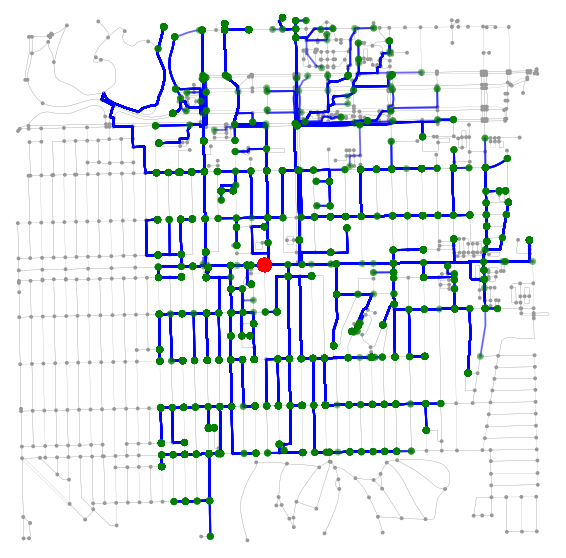

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23b95cc50>)

In [36]:
ox.plot_graph_routes(chicago_5, routes, fig_height=10,fig_width=10, edge_linewidth = 0.2, route_color='b', route_linewidth = 2, orig_dest_node_color=['r','g']*len(routes), orig_dest_node_size=[200,50]*len(routes))
    #ox.plot_route_folium(G, route, route_width = 3, route_color = '#AA1111', tiles = 'Stamen Terrain', popup_attribute = 'name')

In [37]:
mid_node = ox.get_nearest_node(chicago_5, mid)

In [38]:
nx.shortest_path_length(chicago_5, mid_node, sol_node, weight='length')

352.632

In [39]:
routes = []

for idx, row in data_clust_5.iterrows():
    try:
        chicago_5.add_edge(mid_node, nodes[idx])
        routes.append(nx.shortest_path(chicago_5, mid_node, nodes[idx], weight='length'))
    except:
        print('Oops')
ox.add_edge_lengths(chicago_5)

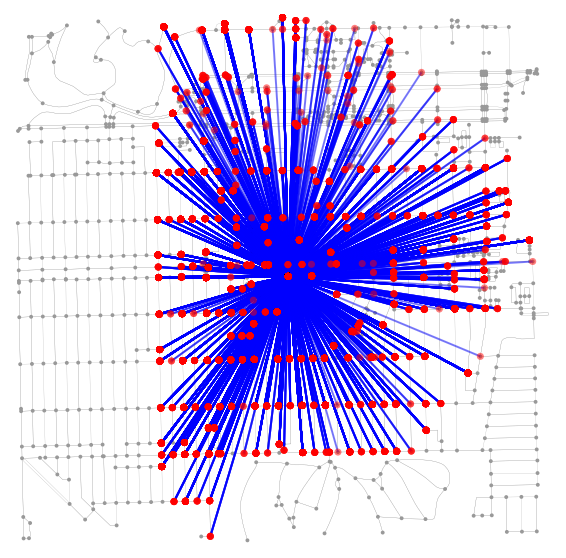

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x233dcf400>)

In [40]:
ox.plot_graph_routes(chicago_5, routes, fig_height=10,fig_width=10, edge_linewidth = 0.2, route_color='b', route_linewidth = 2, orig_dest_node_size=50)

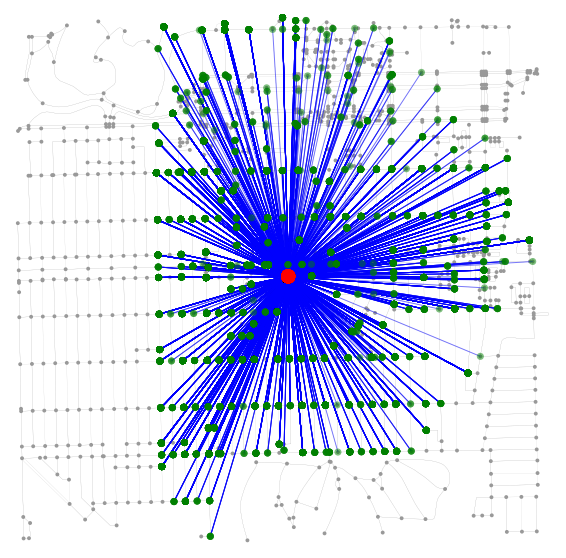

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2321f96d8>)

In [41]:
ox.plot_graph_routes(chicago_5, routes, fig_height=10,fig_width=10, edge_linewidth = 0.1, route_color='b', route_linewidth = 1, orig_dest_node_color=['r','g']*len(routes), orig_dest_node_size=[200,50]*len(routes))
    #ox.plot_route_folium(G, route, route_width = 3, route_color = '#AA1111', tiles = 'Stamen Terrain', popup_attribute = 'name')

In [42]:
routes = []


for idx, row in data_clust_5.iterrows():
    try:
        chicago_5.add_edge(mid_node, nodes[idx])
        routes.append(nx.shortest_path(chicago_5, mid_node, nodes[idx], weight='length'))
    except:
        print('Oops')
ox.add_edge_lengths(chicago_5)

In [43]:
chicago_5.node[mid_node]

{'y': 41.7800057, 'x': -87.6016592, 'osmid': 1929835422}

In [44]:
chicago_5.node[sol_node]

{'y': 41.780445, 'x': -87.6028792, 'osmid': 261158015}

In [45]:
average_length = np.mean(valid_to_crime.sum(axis=1))

In [46]:
# mean shortest path between node and police station
print(valid_to_crime.loc[sol_node, :].mean())
# max
print(valid_to_crime.loc[sol_node, :].max())
# min
print(valid_to_crime.loc[sol_node, :].min())

792.5146509344828
2011.171
0.0
